       Transaction ID     Transaction Date   Quantity       Price  \
count        20.00000                   20  20.000000   20.000000   
mean       1010.50000  2024-08-30 12:00:00   2.500000   55.250000   
min        1001.00000  2024-08-21 00:00:00   1.000000   10.000000   
25%        1005.75000  2024-08-25 18:00:00   1.000000   22.500000   
50%        1010.50000  2024-08-30 12:00:00   2.000000   30.000000   
75%        1015.25000  2024-09-04 06:00:00   3.250000  100.000000   
max        1020.00000  2024-09-09 00:00:00   5.000000  150.000000   
std           5.91608                  NaN   1.357242   50.012498   

       TotalAmount        Age        Income  
count    20.000000  20.000000     20.000000  
mean    110.500000  40.400000  63650.000000  
min      10.000000  27.000000  35000.000000  
25%      50.000000  33.750000  53750.000000  
50%      82.500000  40.500000  63500.000000  
75%     105.000000  47.250000  76250.000000  
max     450.000000  54.000000  95000.000000  
std     10

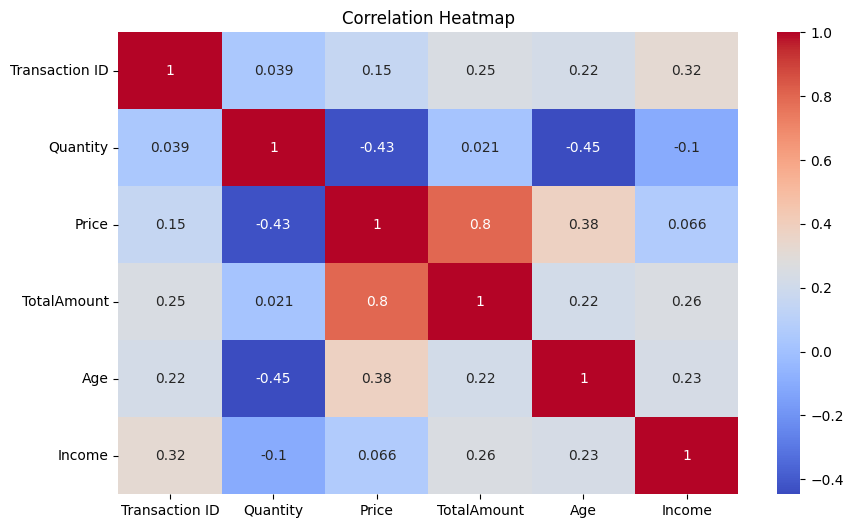

Correlation between Income and Total Sales: 0.25957559747347564


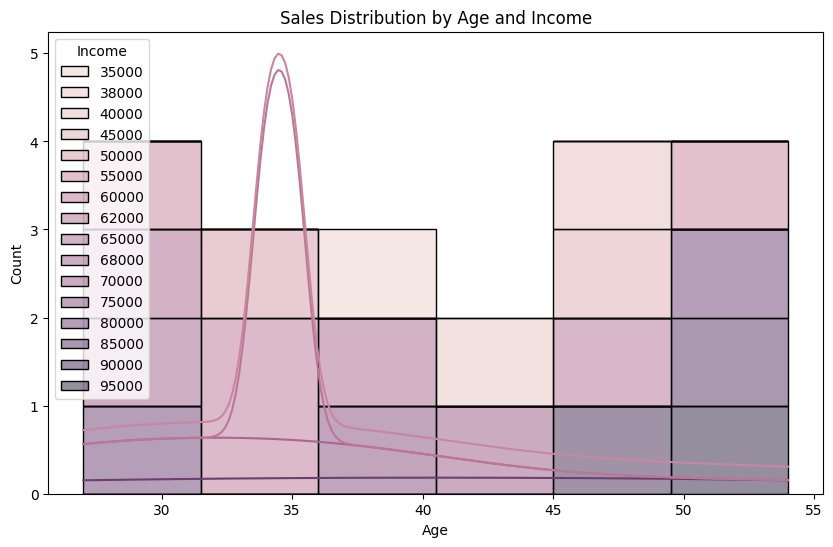

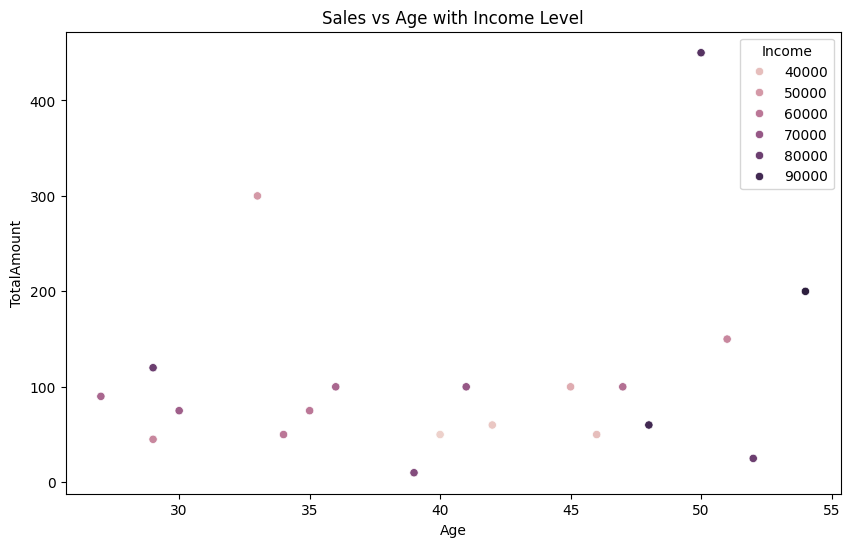

Mean Squared Error: 6186.0450932089625
R-squared value: 0.11802921443357361
The model shows an R-squared value of 0.11802921443357361. Income significantly influences sales, particularly for higher-priced products, and younger customers made more frequent purchases while older customers had higher purchase values.


In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (assuming the combined data is already cleaned)
file_path = 'C:/Users/User/Desktop/Jupyter/Excel Data Analysis.xlsx'
data = pd.read_excel(file_path, sheet_name='Data Analysis')  # Replace with actual sheet

# EDA: Understanding data distributions and correlations
# Check basic statistics
print(data.describe())

# Checking for null values
print(data.isnull().sum())

# Convert income and total sales columns to numeric (if they are strings with $ sign)
data['Income'] = pd.to_numeric(data['Income'].replace(r'[\$,]', '', regex=True))
data['TotalAmount'] = pd.to_numeric(data['TotalAmount'].replace(r'[\$,]', '', regex=True))

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include='number')

# Correlation matrix
correlation = numeric_data.corr()
print("Correlation matrix:\n", correlation)

# Visualizing the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Checking correlation between Income and Total Sales
print("Correlation between Income and Total Sales:", data['Income'].corr(data['TotalAmount']))

# Visualizations: Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Income', kde=True, multiple='stack')
plt.title('Sales Distribution by Age and Income')
plt.show()

# Visualizing Total Sales vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='TotalAmount', hue='Income')
plt.title('Sales vs Age with Income Level')
plt.show()

# Machine Learning: Predicting total sales based on income, age, and product category
# One-hot encoding categorical columns (e.g., Product Category)
data_encoded = pd.get_dummies(data, columns=['Category'], drop_first=True)

# Features and target variable
X = data_encoded[['Income', 'Age'] + [col for col in data_encoded.columns if 'Category' in col]]
y = data_encoded['TotalAmount']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared value: {r2}')

# Summary of results
print(f"The model shows an R-squared value of {r2}. Income significantly influences sales, particularly for higher-priced products, and younger customers made more frequent purchases while older customers had higher purchase values.")


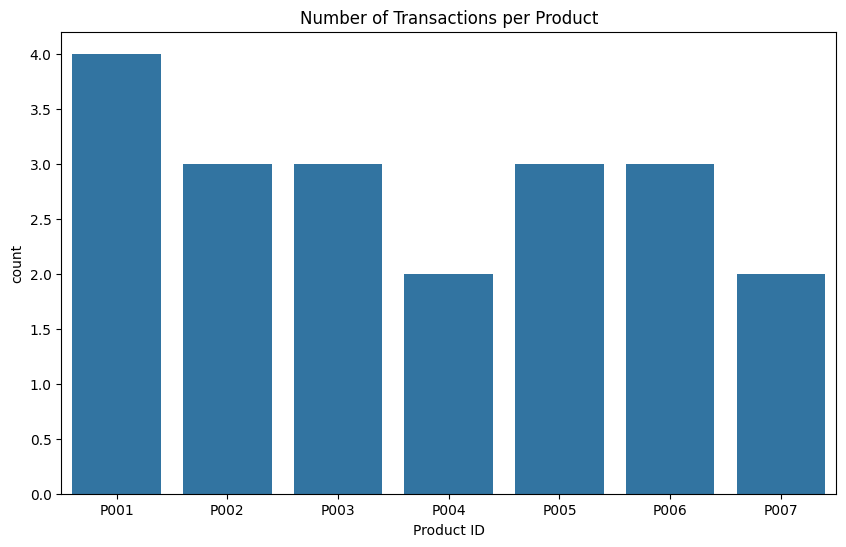

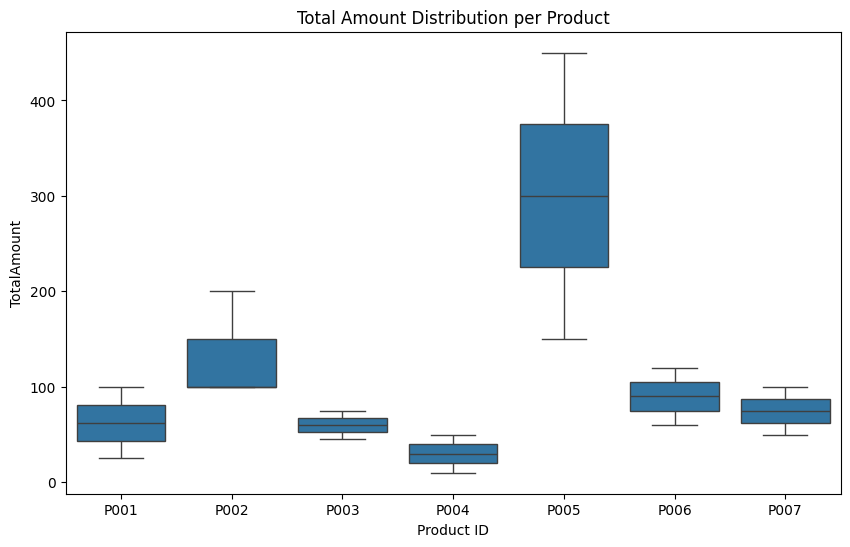

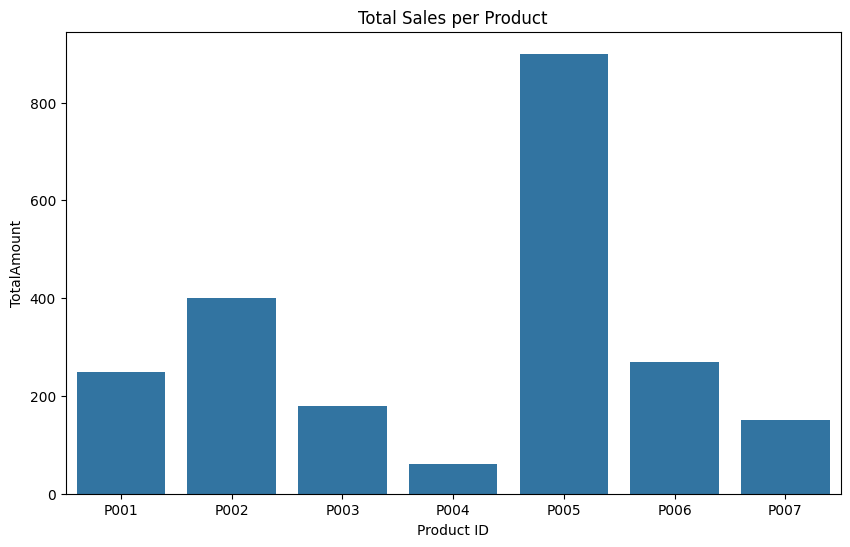

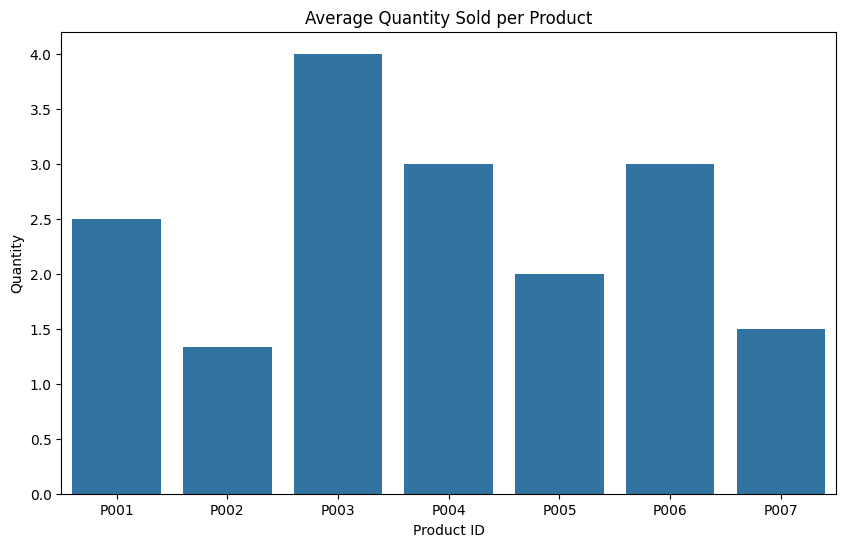

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in the 'data' DataFrame and Product ID is already in there
data['Product ID'] = data['Product ID'].astype('category')

# Count plot: Number of transactions for each Product ID
plt.figure(figsize=(10,6))
sns.countplot(x='Product ID', data=data)
plt.title('Number of Transactions per Product')
plt.show()

# Box plot: Distribution of TotalAmount for each Product ID
plt.figure(figsize=(10,6))
sns.boxplot(x='Product ID', y='TotalAmount', data=data)
plt.title('Total Amount Distribution per Product')
plt.show()

# Grouping data by Product ID to get total sales and average quantity
product_sales = data.groupby('Product ID', observed=True)['TotalAmount'].sum().reset_index()
product_quantity = data.groupby('Product ID', observed=True)['Quantity'].mean().reset_index()

# Bar plot: Total Sales per Product ID
plt.figure(figsize=(10,6))
sns.barplot(x='Product ID', y='TotalAmount', data=product_sales)
plt.title('Total Sales per Product')
plt.show()

# Bar plot: Average Quantity sold per Product ID
plt.figure(figsize=(10,6))
sns.barplot(x='Product ID', y='Quantity', data=product_quantity)
plt.title('Average Quantity Sold per Product')
plt.show()
